# Анализ продаж

# Подгружаем данные:

In [156]:
import pandas as pd

df = pd.read_excel('/content/Online Retail.xlsx')

# Посмотрим на данные и главные характеристики:

In [157]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [159]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [160]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


# Предобработка данных

In [165]:
# Проверяем на дубликаты
print('duplicated',df.duplicated().sum())

# Проверяем на пропуски
print("null", df.isnull().sum())

duplicated 0
null InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [162]:
# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с отрицательным Quantity
df = df[df['Quantity'] > 0]

# Удаление строк с отрицательными UnitPrice
df = df[df['UnitPrice'] > 0]

# Добавим столбец для подсчета общей стоимости заказа: TotalPrice = Quantity * UnitPrice.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Удаление строк с пропущенным CustomerID
df = df.dropna(subset=['CustomerID'])

In [ ]:

# Меняем тип CustomerID
df['CustomerID'] = df['CustomerID'].astype('str')
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)  # Заполним NaN нулями и преобразуем в int
df = df[df['CustomerID'] != 0]

# Общая статистика

## Общее количество заказов
Каждый заказ в нашем датасете связан с уникальным InvoiceNo. Для подсчета общего количества заказов просто посчитаем уникальные значения в этом столбце.

In [168]:
total_orders = df['InvoiceNo'].nunique()
print('Общее количество заказов:', total_orders)

Общее количество заказов: 18532


## Количество уникальных клиентов

In [169]:
unique_customers = df['CustomerID'].nunique()
print('Общее количество уникальных клиентов:', unique_customers)

Общее количество уникальных клиентов: 4338


## Общий доход
Добавим столбец для подсчета общей стоимости заказа: TotalPrice = Quantity * UnitPrice.

Посмотрим на общий доход

In [170]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

total_revenue = df['TotalPrice'].sum()
print('Общий доход:', total_revenue)

Общий доход: 8887208.894


## Топ заказанных продуктов по выручке

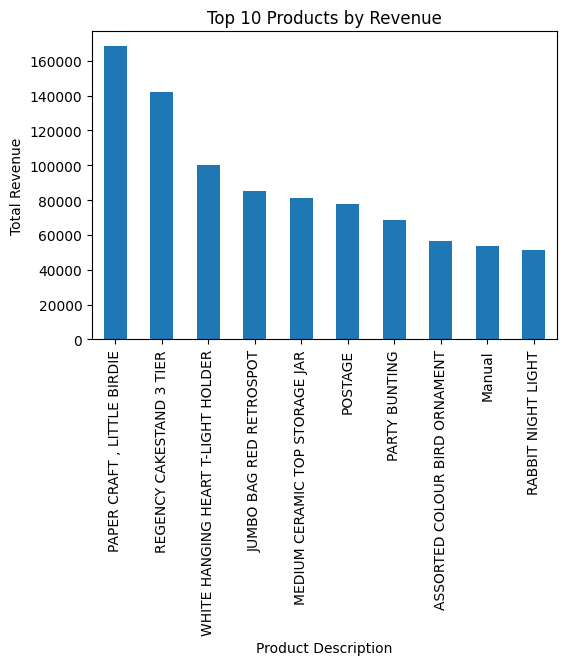

In [171]:
import matplotlib.pyplot as plt

# Группируем по продуктам и считаем общую выручку для каждого
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

# Покажем топ 10 самых прибыльных товаров
top_10_products = product_revenue.head(10)

# Визуализируем
top_10_products.plot(kind='bar', figsize=(6, 4))
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

## Выручка по месяцам

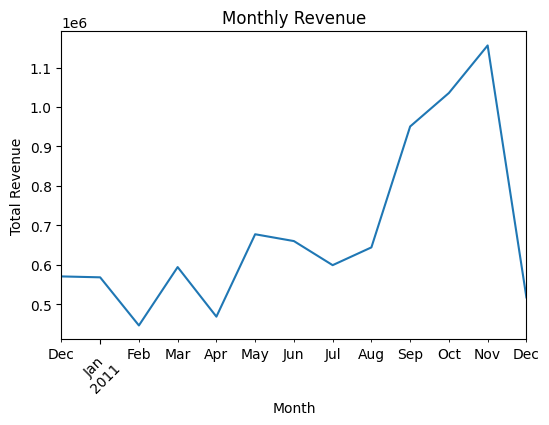

In [172]:
# Добавим столбец для месяца и года
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Группируем по месяцам и считаем выручку
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

# Визуализируем
monthly_revenue.plot(kind='line', figsize=(6, 4))
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Распределение продаж по странам
Посмотрим на уникальные значения в столбце "Country". Мы можем проанализировать, какие страны имеют наибольшие объемы заказов. Это поможет в дальнейшем оценить, какие регионы могут быть наиболее интересными для роста.

Посчитаем количество заказов и выручку по каждой стране.

In [173]:
# Создаем DataFrame с количеством заказов и выручкой по странам
summary_by_country = pd.DataFrame({
    'Revenue': df['TotalPrice'].groupby(df['Country']).sum(),
    'Number of Orders': df['InvoiceNo'].groupby(df['Country']).nunique()
})

# Сортируем по выручке
summary_by_country.sort_values(by='Revenue', ascending=False).head(10)

,Revenue,Number of Orders
Country,,
United Kingdom,7285024.644,16646
Netherlands,285446.340,94
EIRE,265262.460,260
Germany,228678.400,457
France,208934.310,389
Australia,138453.810,57
Spain,61558.560,90
Switzerland,56443.950,51
Belgium,41196.340,98


## Cреднее колличесво заказов на клиента

Это типичный случай, когда распределение сильно скошено влево, и логарифмическое преобразование помогает лучше увидеть различные уровни клиентов.

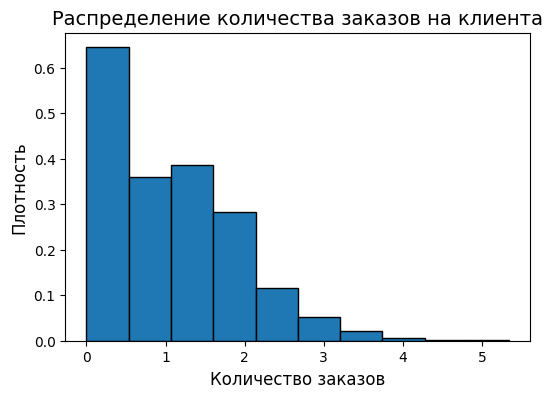

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Считаем количество заказов для каждого клиента
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Строим гистограмму без логарифмирования, но с нормализацией
plt.figure(figsize=(6,4))
plt.hist(np.log(orders_per_customer), bins=10, density=True, edgecolor='black')
plt.title('Распределение количества заказов на клиента', fontsize=14)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.show()

#1. Retention
Retention — это метрика, которая показывает, сколько пользователей вернулись к продукту спустя определённое время после первого использования.

Найдём процент клиентов, которые сделали хотя бы 1 повторный заказ в течении 7 и 30 дней после первого заказа:

In [175]:
# Группируем данные по заказам и сохраняем только уникальные значения по каждому заказу
orders_df = df.groupby(['CustomerID', 'InvoiceNo'], as_index=False).agg({
    'InvoiceDate': 'min',  # выбираем дату первого заказа
    'TotalPrice': 'sum'    # суммируем цену всех товаров в заказе
})

# Находим дату первого заказа для каждого клиента
orders_df['FirstPurchaseDate'] = orders_df.groupby('CustomerID')['InvoiceDate'].transform('min')

# Вычисляем разницу в днях между текущим заказом и первым заказом клиента
orders_df['DaysSinceFirstPurchase'] = (orders_df['InvoiceDate'] - orders_df['FirstPurchaseDate']).dt.days

# Отфильтруем заказы, сделанные после первого заказа
orders_returned = orders_df[orders_df['DaysSinceFirstPurchase'] > 0]

# Для каждого клиента найдем его повторную покупку в пределах 7 дней
repeat_purchase_7_days = orders_returned[orders_returned['DaysSinceFirstPurchase'] <= 7]
repeat_purchase_30_days = orders_returned[orders_returned['DaysSinceFirstPurchase'] <= 30]

# Количество уникальных клиентов, совершивших повторную покупку
customers_with_repeat_purchase7 = repeat_purchase_7_days['CustomerID'].nunique()
customers_with_repeat_purchase30 = repeat_purchase_30_days['CustomerID'].nunique()

# 7. Общее количество уникальных клиентов
total_customers = df['CustomerID'].nunique()

# 8. Рассчитываем retention rate
retention_rate_7_days = (customers_with_repeat_purchase7 / total_customers) * 100
retention_rate_30_days = (customers_with_repeat_purchase30 / total_customers) * 100

# 9. Выводим результат
print(f"Retention по клиентам за 7 дней: {retention_rate_7_days:.2f}%")
print(f"Retention по клиентам за 30 дней: {retention_rate_30_days:.2f}%")

Retention по клиентам за 7 дней: 5.56%
Retention по клиентам за 30 дней: 18.70%


# Анализ количества заказов

Создадим таблицу по клиентам с такмими данными как:
- Суммарная выручка на клиента
- Колличесво заказов клиента
- Средний чек клиента

## Суммарная выручка на клиента

In [176]:
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'TotalRevenue']

# Посмотрим на данные
customer_revenue.sort_values(by='TotalRevenue', ascending=False).head()

,CustomerID,TotalRevenue
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194390.79
3008,16446.0,168472.50
1879,14911.0,143711.17


## Заказы и средняя выручка на клиента

In [177]:
# Количество заказов на клиента
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_orders.columns = ['CustomerID', 'TotalOrders']

# Соединим данные о выручке и количестве заказов
customer_data = customer_revenue.merge(customer_orders, on='CustomerID')

# Средний чек клиента
customer_data['AverageOrderValue'] = customer_data['TotalRevenue'] / customer_data['TotalOrders']

# Посмотрим на данные
customer_data.head()

,CustomerID,TotalRevenue,TotalOrders,AverageOrderValue
0,12346.0,77183.60,1,77183.600000
1,12347.0,4310.00,7,615.714286
2,12348.0,1797.24,4,449.310000
3,12349.0,1757.55,1,1757.550000
4,12350.0,334.40,1,334.400000


# Average Revenue per Paying User
Среднее на совершившего заказ пользователя
В этом случае мы рассчитаем среднюю выручку на платящего пользователя — ARPPU.  

In [77]:
# Average Revenue per Paying User
Среднее на совершившего заказ пользователя
В этом случае мы рассчитаем среднюю выручку на платящего пользователя — ARPPU.

# Средний ARPO  по всем клиентам
ARPPU= customer_data['TotalRevenue'].mean()
print(f"Средняя выручка на платящего пользователя (ARPPU): {ARPPU:.2f}")

Средняя выручка на платящего пользователя (ARPPU): 2048.69


# Average Order Value

Среднее на совершённый заказ
Так мы рассчитаем среднюю стоимость заказа или средний чек — AOV.

In [78]:
# среднюю стоимость заказа или средний чек — AOV
AOV = customer_data['TotalRevenue'].sum() / customer_data['TotalOrders'].sum()
print(f"Cредняя стоимость заказа (AOV): {AOV:.2f}")

Cредняя стоимость заказа (AOV): 479.56


# Conversion Rate
Конверсия показывает, какая доля пользователей совершает целевое действие из общего числа пользователей на определенном этапе воронки.

Так как у нас есть данные только о клиентах, которые сделали заказы, можно рассчитать долю клиентов, совершивших более одной покупки, от всех клиентов за весь период:

In [81]:
conversion_rate = customer_data[customer_data['TotalOrders'] > 1]['CustomerID'].nunique() / customer_data['CustomerID'].nunique() * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 65.58%
